In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\sameer sheikh\OneDrive\Desktop\economic.csv')

In [4]:
df.head()

,year,month,intrest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [5]:
df.isnull().sum()

year                 0
month                0
intrest_rate         0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
df.drop(columns=['month','year'],inplace=True)

In [8]:
df.head()

,intrest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [13]:
df.corr()

,intrest_rate,unemployment_rate,index_price
intrest_rate,1.000000,-0.925814,0.944686
unemployment_rate,-0.925814,1.000000,-0.938270
index_price,0.944686,-0.938270,1.000000


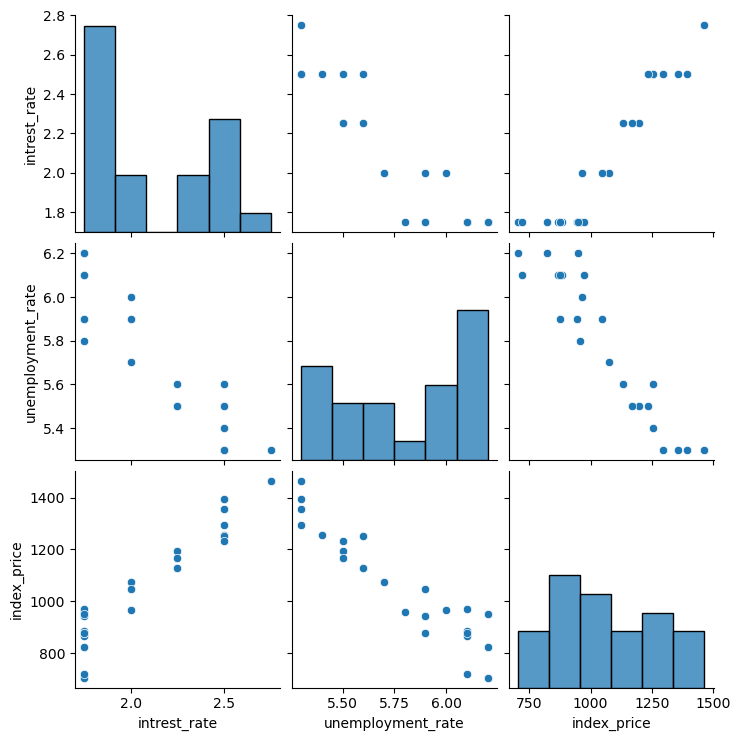

In [9]:
sns.pairplot(df)

<Axes: xlabel='intrest_rate', ylabel='unemployment_rate'>

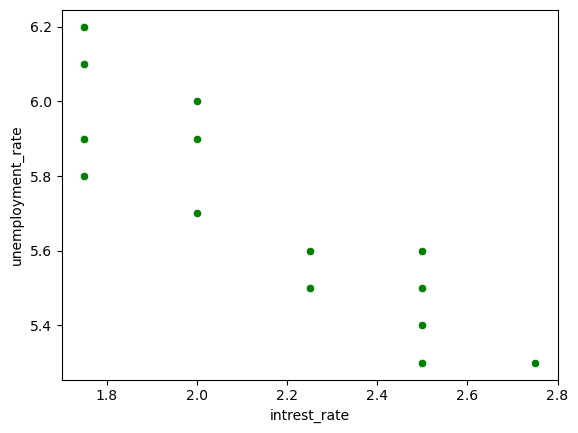

In [12]:
sns.scatterplot(x=df['intrest_rate'],y=df['unemployment_rate'],data=df,color='g')

In [15]:
#input and output
input=df[['intrest_rate','unemployment_rate']]
output=df[['index_price']]
output.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [22]:
from sklearn.model_selection import train_test_split
input_train,input_test,output_train,output_test=train_test_split(input,output,train_size=0.75,random_state=42)

In [23]:
input_train

,intrest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
input_train=scaler.fit_transform(input_train)
input_test=scaler.fit_transform(input_test)
input_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [27]:
model.fit(input_train,output_train)

LinearRegression()

In [28]:
from sklearn.model_selection import cross_val_score

In [33]:
#cross validtion
from sklearn.model_selection import cross_val_score
validation=cross_val_score(model,input_train,output_train,scoring='neg_mean_squared_error',cv=3)

In [35]:
validation.mean()

-4367.067481964158

In [37]:
test_predict=model.predict(input_test)
test_predict

array([[1177.08774756],
       [ 784.68322384],
       [1373.80769573],
       [ 823.82013895],
       [ 961.31702814],
       [1137.95083245]])

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(output_test,test_predict)
mae=mean_absolute_error(output_test,test_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7403.390901576039
66.73508222427061
86.04295962817666


In [42]:
from sklearn.metrics import r2_score
score=r2_score(output_test,test_predict)
print(score)
adjusted_rscore=(1-score)*(len(output_test)-1)/(len(output_test)-input_test.shape[1]-1)
print(adjusted_rscore)

0.7963890332246194
0.33935161129230096


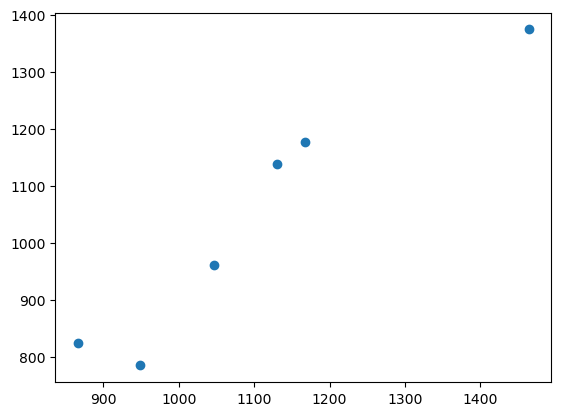

In [43]:
plt.scatter(output_test,test_predict)

In [45]:
residuals=output_test-test_predict
print(residuals)

    index_price
8    -10.087748
16   164.316776
0     90.192304
18    42.179861
11    85.682972
9     -7.950832


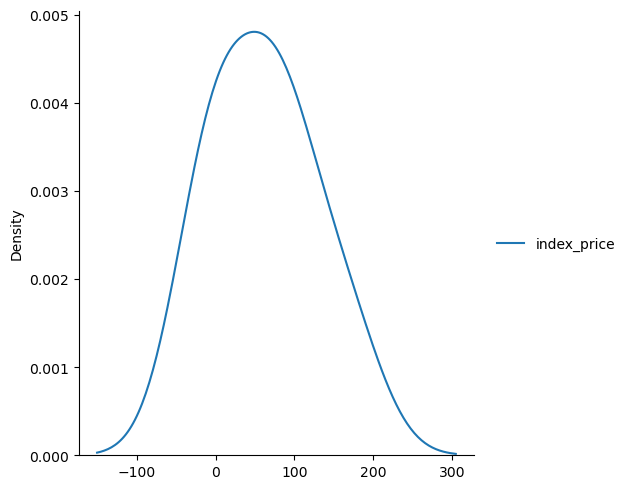

In [47]:
sns.displot(residuals,kind='kde')

# Multiple linear regrwssion project 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
data=fetch_california_housing()

In [5]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
data.target_names

['MedHouseVal']

In [14]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [16]:
print(data.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


# lets prepare dataset

In [17]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
df['price']=data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

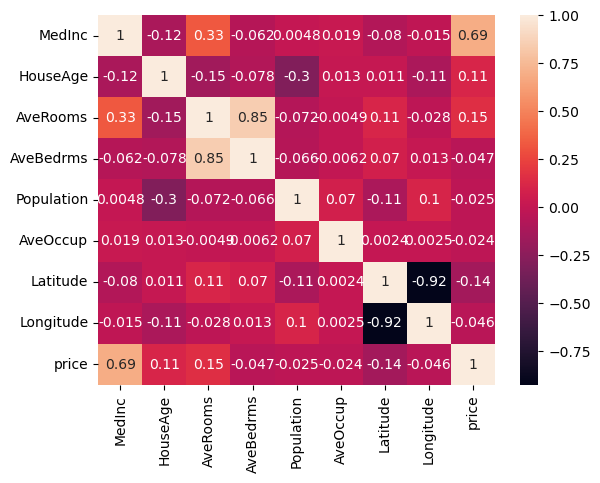

In [25]:
sns.heatmap(df.corr(),annot=True)

# creating independant and dependant features

In [26]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [27]:
x=df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']] #independant
y=df[['price']] #dependand

In [28]:
x.head(), y.head()

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
    price
 0  4.526
 1  3.585
 2  3.521
 3  3.413
 4  3.422)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13828, 8), (6812, 8), (13828, 1), (6812, 1))

In [34]:
# standardising the input data only for tarinning and testing
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [35]:
x_train

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [36]:
x_test

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

# model trainning 

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
model.coef_

array([[ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
        -0.02810091, -0.93017985, -0.89505497]])

In [41]:
model.intercept_

array([2.06347681])

# prediction

In [42]:
y_predict=model.predict(x_test)

In [43]:
y_predict

array([[3.00397485],
       [2.58011486],
       [2.3489077 ],
       ...,
       [3.09003708],
       [0.79152007],
       [2.04477012]])

# perpormance metrics

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.5522332399363618
0.537105694300796
0.7431239734636218


In [45]:
# r sqaure perpormance
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
print(score)

0.593595852643664


# assumptions

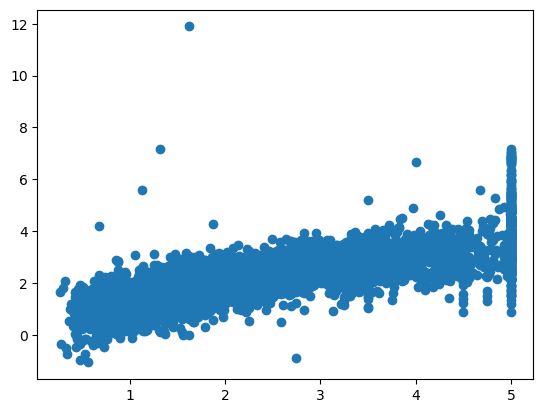

In [46]:
plt.scatter(y_test,y_predict)

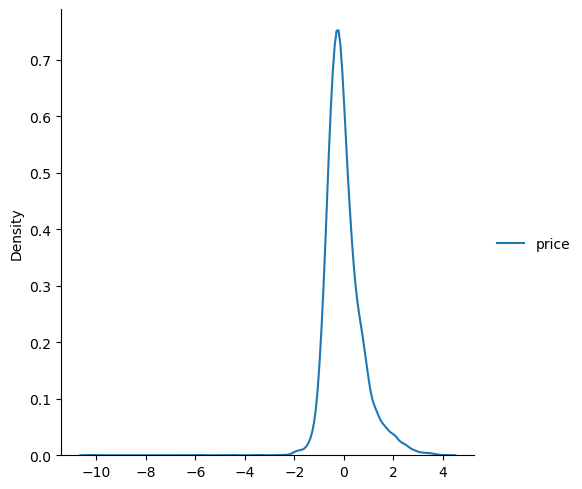

In [48]:
residuals=y_test-y_predict
sns.displot(residuals,kind='kde')

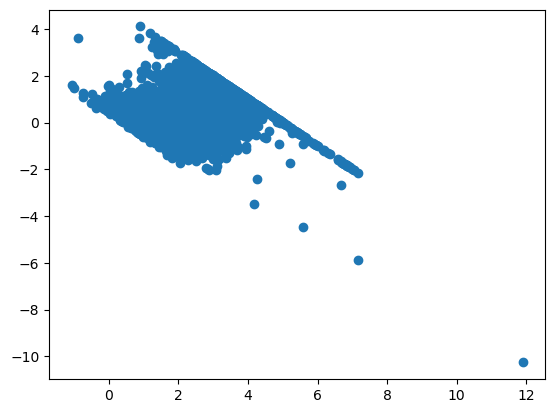

In [50]:
plt.scatter(y_predict,residuals)

# pickling or exporting model

In [51]:
import pickle

In [52]:
#exporting
pickle.dump(obj=model,file=open(r'C:\Users\sameer sheikh\OneDrive\Desktop\linearmodel.pkl','wb'))

In [53]:
#imporing
pickle.load(file=open(r'C:\Users\sameer sheikh\OneDrive\Desktop\linearmodel.pkl','rb'))

LinearRegression()

1.359064811340808
0.921173027224541
1.1657893511869148
-0.00017444788113429865


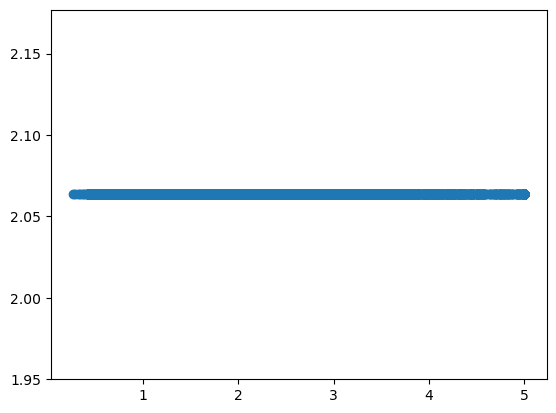

In [54]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso_y_predict=lasso.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,lasso_y_predict)
mae=mean_absolute_error(y_test,lasso_y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
# r sqaure perpormance
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_y_predict)
print(score)
plt.scatter(y_test,lasso_y_predict)

0.552196373883873
0.5370902303675108
0.7430991682702067
0.5936229834201994


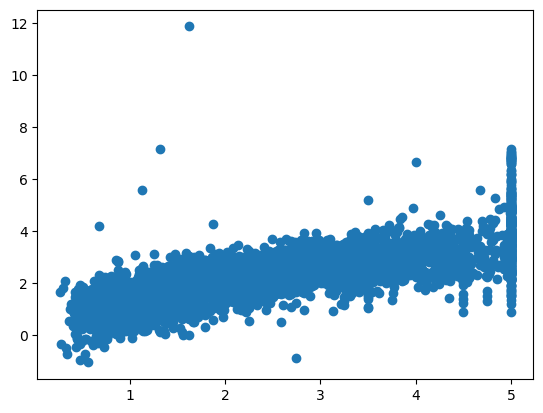

In [55]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge_y_predict=ridge.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,ridge_y_predict)
mae=mean_absolute_error(y_test,ridge_y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
# r sqaure perpormance
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_y_predict)
print(score)
plt.scatter(y_test,ridge_y_predict)

1.081525687201919
0.821329541607979
1.039964272079536
0.20407448707375442


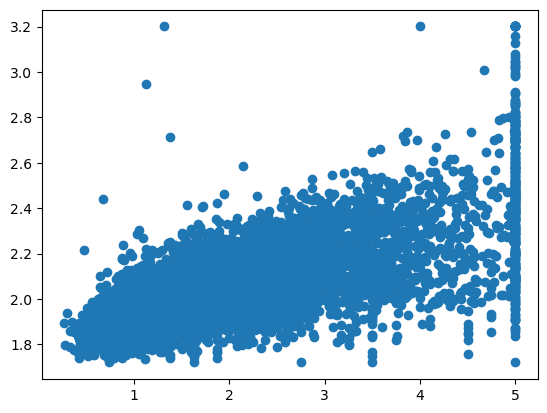

In [56]:
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet()
elasticNet.fit(x_train,y_train)
elasticNet_y_predict=elasticNet.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,elasticNet_y_predict)
mae=mean_absolute_error(y_test,elasticNet_y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
# r sqaure perpormance
from sklearn.metrics import r2_score
score=r2_score(y_test,elasticNet_y_predict)
print(score)
plt.scatter(y_test,elasticNet_y_predict)

# polynomial regression

1.4783039498482995
0.48342864599591656
1.21585523391903
-0.0879259211937975


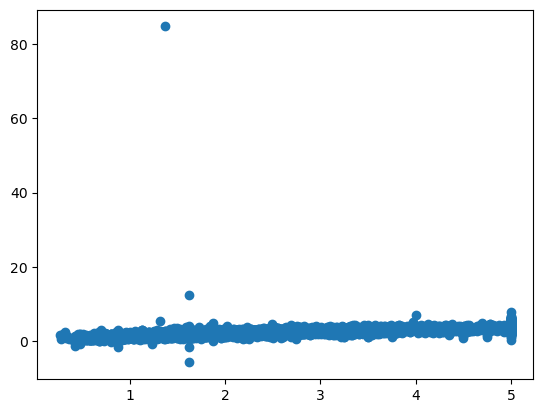

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)
model.fit(x_train_poly,y_train)
y_pred_poly=model.predict(x_test_poly)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred_poly)
mae=mean_absolute_error(y_test,y_pred_poly)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
# r sqaure perpormance
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_poly)
print(score)
plt.scatter(y_test,y_pred_poly)